In [3]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np

In [5]:
url = "https://docs.google.com/spreadsheets/d/1P0ob0sfz3xqG8u_dxT98YcVTMwzPSnya_qx6MbX-_Z8/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url)
                  
df[:10]

,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2017-11-08,Amran,"89,729",170,0.19,77.315,Amran,عمران,29.0
1,2017-11-08,Al Mahwit,"52,920",145,0.27,72.472,Al Mahwit,المحويت,27.0
2,2017-11-08,Al Dhale'e,"46,721",81,0.17,63.870,Al Dhale'e,الضالع,30.0
3,2017-11-08,Abyan,"27,957",35,0.13,48.976,Abyan,أبين,12.0
4,2017-11-08,Sana'a,"66,086",122,0.18,44.946,Sana'a,صنعاء,23.0
5,2017-11-08,Hajjah,"100,850",414,0.41,43.288,Hajjah,حجة,17.0
6,2017-11-08,Dhamar,"84,741",157,0.19,42.112,Dhamar,ذمار,20.0
7,2017-11-08,Al Hudaydah,"131,827",268,0.20,40.710,Al Hudaydah,الحديدة,18.0
8,2017-11-08,Al Bayda,"25,905",31,0.12,34.113,Al Bayda,البيضاء,14.0
9,2017-11-08,Amanat Al Asimah,"87,578",68,0.08,30.970,Amanat Al Asimah,أمانة العاصمة,13.0


In [49]:
df_latest = df.loc[df.Date == "2017-11-08"].sort_values("Cases", ascending=False)
df_first = df.loc[df.Date == "2017-05-22"].sort_values("Cases", ascending=False)

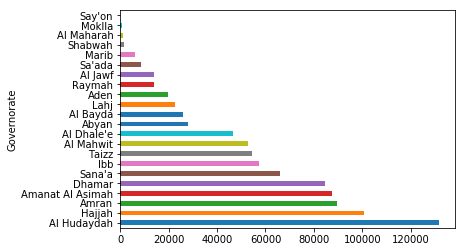

In [62]:
df_latest.set_index("Governorate")["Cases"].plot(kind="barh")

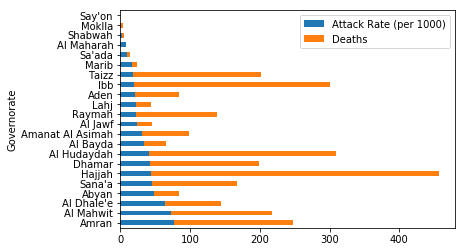

In [66]:
df_latest.set_index("Governorate")[["Attack Rate (per 1000)", "Deaths"]].sort_values("Attack Rate (per 1000)", ascending=False).plot(kind="barh", stacked="True")

In [173]:
# Removing commas for an entire column and converting to integers
#df["Cases"] = [int(x.replace(",","")) for x in df["Cases"]]
# And converting to date is even simpler
#df["Date"] = pd.to_datetime(df["Date"])

#data_slice = df[["Date", "Governorate", "Cases", "Deaths", "CFR (%)", "Attack Rate (per 1000)"]].sort_values("Attack Rate (per 1000)", ascending=False)
ds_start = data_slice.loc[data_slice.Date == "2017-05-22"].set_index("Governorate")
ds_end = data_slice.loc[data_slice.Date == "2017-11-08"].set_index("Governorate")
print(ds_start["CFR (%)"].mean())
print(ds_end["CFR (%)"].mean())

1.17058823529
0.226818181818


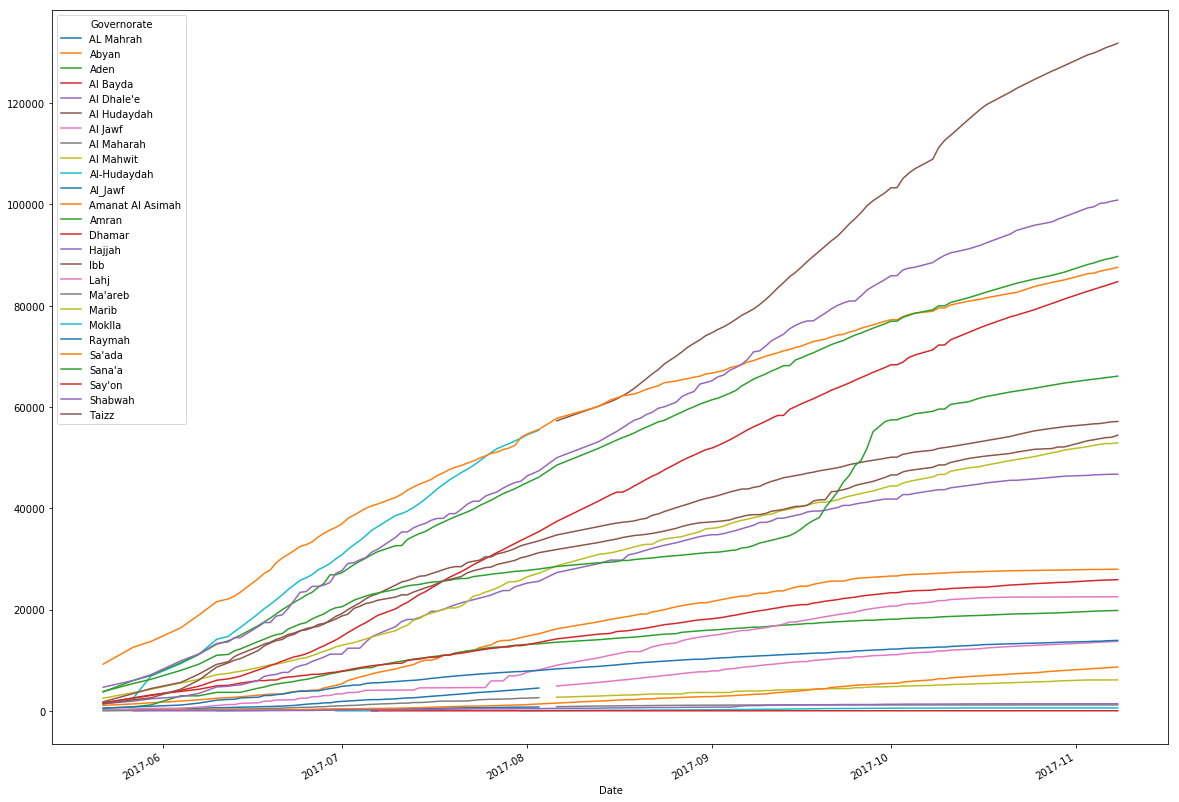

In [7]:
drawing = pd.pivot_table(data_slice, values="Cases", index=["Date"], columns=["Governorate"])
drawing.plot(figsize=(20,15), grid=False)

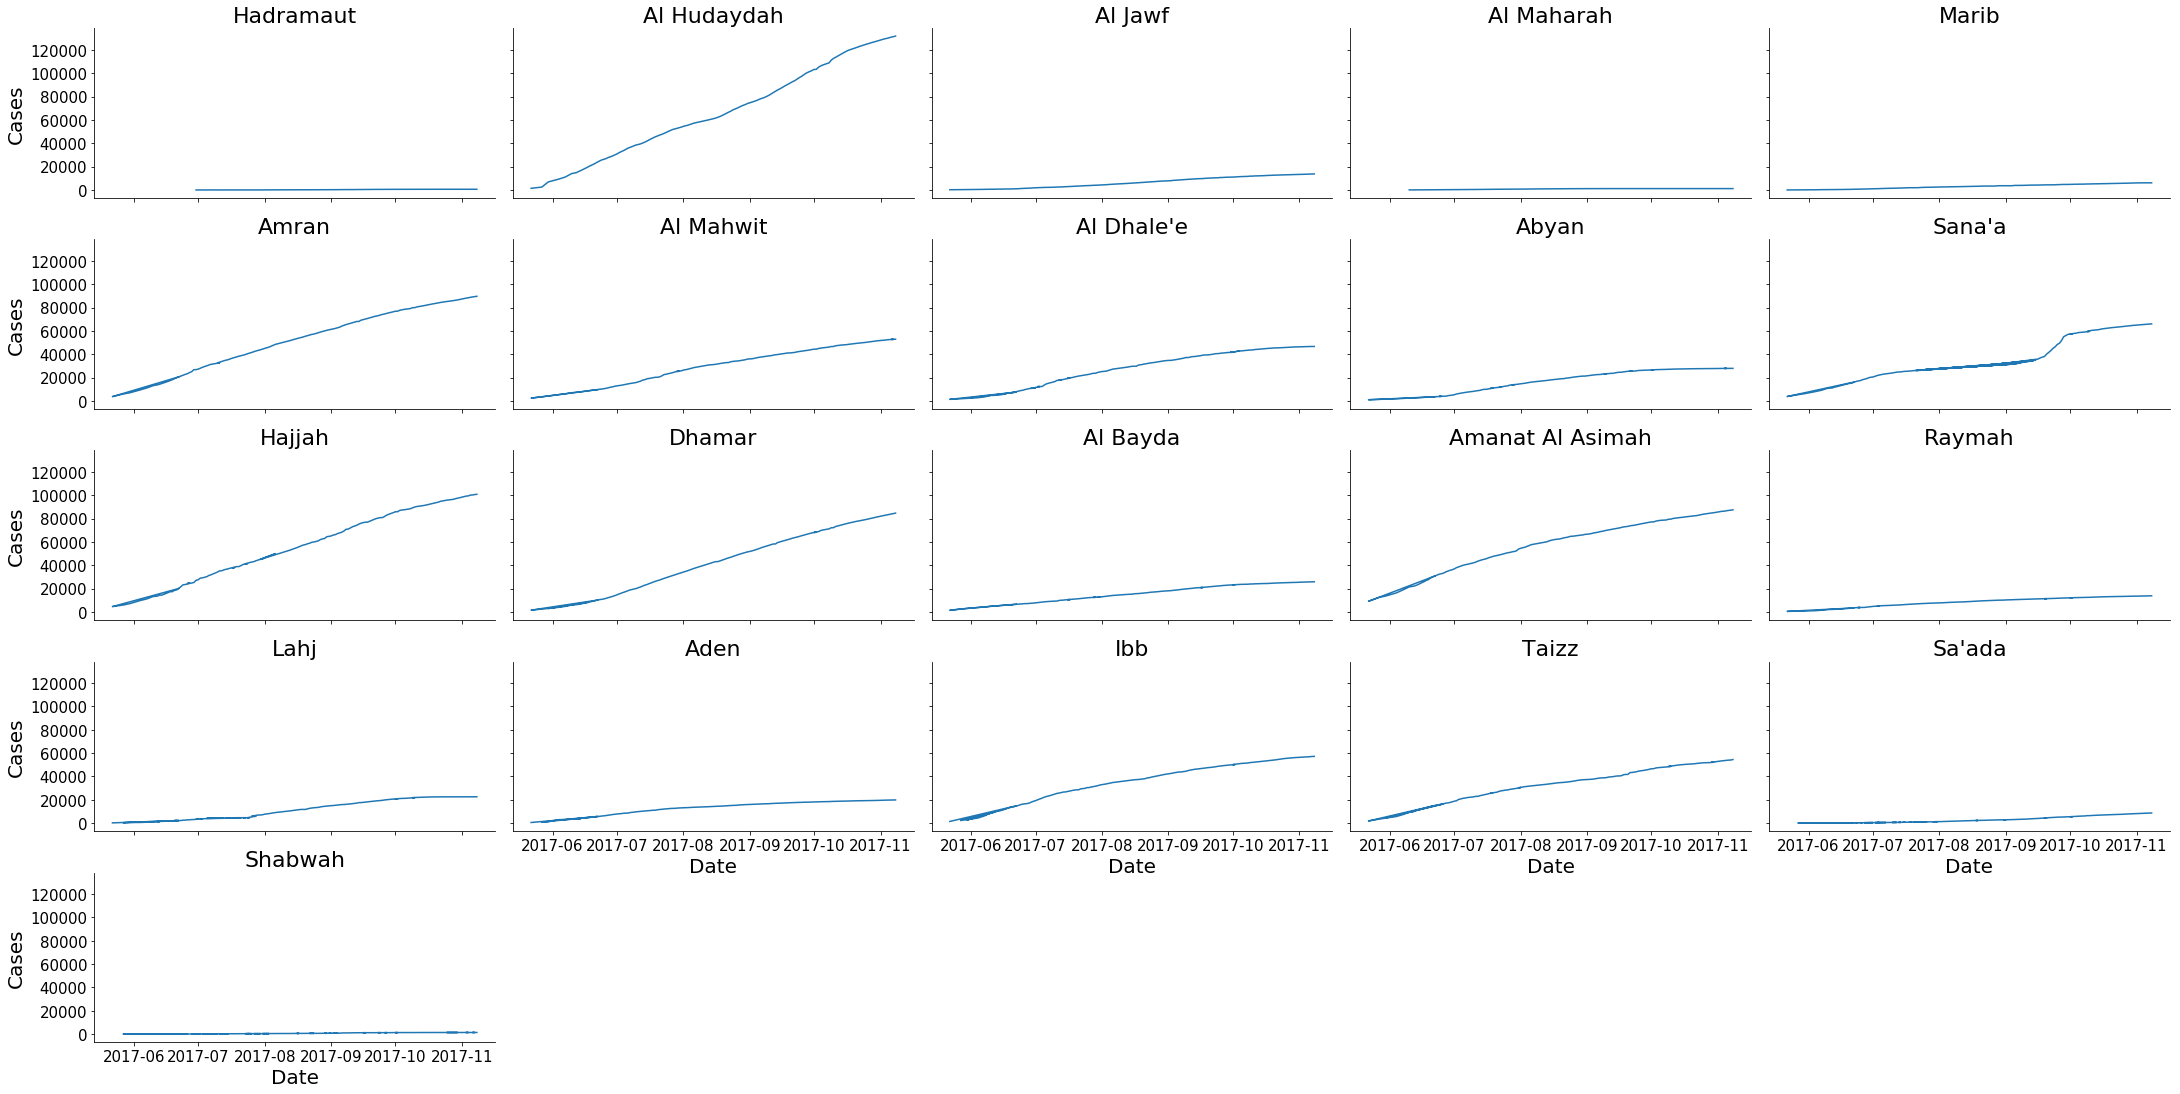

In [58]:
g = sns.FacetGrid(ns, col="Governorate", col_wrap=5, size=3, aspect=2, margin_titles=True)
g = g.map(plt.plot, "Date", "Cases")
g.set_titles("{col_name}", size=22).set_ylabels(size=20).set_yticklabels(size=15).set_xlabels(size=20).set_xticklabels(size=15)

In [56]:
#data_slice = df[["Date", "Governorate", "Cases", "Deaths", "CFR (%)", "Attack Rate (per 1000)"]].sort_values("Attack Rate (per 1000)", ascending=False)

def fix_data(data, date_list, fix_govs):
    """
    For a given dataframe, date list, and dictionary of Governorates
    Loop through the keys in the dictionary and combine the list 
    of associated governorates into a new dataframe.
    Return a new, corrected, dataframe.
    """
    # Create an empty list for each of the new dataframes we'll create
    new_frames = []
    # And an empty list for all the governorates we'll need to remove later
    remove = []
    # Loop through each of the governorates we need to fix
    for key in fix_govs.keys():
        # Create a filtered dataframe containing only the governorates to fix
        ds = data.loc[data_slice.Governorate.isin(fix_govs[key])]
        # New entries for the new dataframe
        new_rows = {"Date": [],
                    "Cases": [],
                    "Deaths": [],
                    "CFR (%)": [],
                    "Attack Rate (per 1000)": []
                   }
        # Divisor for averages (i.e. there could be more than 2 govs to fix)
        num = len(fix_govs[key])
        # Add the governorate values to the remove list
        remove.extend(fix_govs[key])
        # For each date, generate new values
        for d in date_list:
            # Data in the dataframe is stored as a Timestamp value
            r = ds[ds["Date"] == pd.Timestamp(d)]
            new_rows["Date"].append(pd.Timestamp(d))
            new_rows["Cases"].append(r.Cases.sum())
            new_rows["Deaths"].append(r.Deaths.sum())
            new_rows["CFR (%)"].append(r["CFR (%)"].sum()/num)
            new_rows["Attack Rate (per 1000)"].append(r["Attack Rate (per 1000)"].sum()/num)
        # Create a new dataframe from the combined data
        new_rows = pd.DataFrame(new_rows)
        # And assign the values to the key governorate
        new_rows["Governorate"] = key
        # Add the new dataframe to our list of new frames
        new_frames.append(new_rows)
    # Get an inverse filtered dataframe from what we had before
    ds = data_slice.loc[~data_slice.Governorate.isin(remove)]
    new_frames.append(ds)
    # Return a new contatenated dataframe with all our corrected data
    return pd.concat(new_frames, ignore_index=True)

fix = {"Hadramaut": ["Moklla","Say'on"],
       "Al Hudaydah": ["Al Hudaydah", "Al-Hudaydah"], 
       "Al Jawf": ["Al Jawf", "Al_Jawf"], 
       "Al Maharah": ["Al Maharah", "AL Mahrah"], 
       "Marib": ["Marib", "Ma'areb"]
      }
date_list = df["Date"].unique()

ns = fix_data(data_slice, date_list, fix)

In [106]:
import geopandas as gpd
pts = gpd.GeoDataFrame.from_file("data/yem_admin1.shp")
pts = pts.loc[~pts.name_en.isin(["Socotra"])]
pts2 = pd.merge(pts, ns, how="outer", left_on="name_en", right_on="Governorate", indicator=False)
pl = pts2.loc[pts2.Date == "2017-11-08"]

C:\Users\Turukawa\Anaconda3\envs\datascience\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


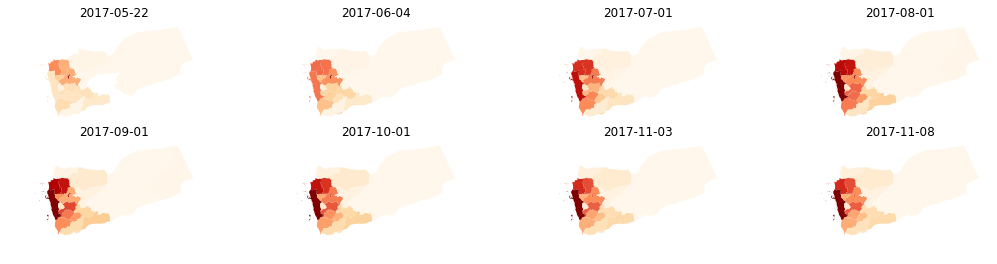

In [166]:
#fig, axes = plt.subplots(5, 5, figsize=(10,7))
#for ax in axes:
#    ax.set_aspect('equal')
#ax.set_axis_off()
#    pts2.plot(ax=ax, column='Cases', row="Date", cmap='OrRd')#, scheme='quantiles')
#pts2.plot(subplots=True, column='Cases', row="Date", cmap='OrRd')#, scheme='quantiles')
date_list = df["Date"].unique()
date_list.sort()

fig = plt.figure(figsize=(18,4))
l = 0
j = 1

for i, d in enumerate(date_list):
    check_date = pd.Timestamp(d).to_pydatetime()
    if check_date.month == l:
        if i < len(date_list)-1:
            continue
    l = check_date.month
    pl = pts2.loc[pts2.Date == pd.Timestamp(d)]
    ax = fig.add_subplot(2, 4, j)
    j+=1
    ax.set_aspect('equal')
    ax.set_axis_off()
    ax.title.set_text(pd.Timestamp(d).date())
    pl.plot(ax=ax, column='Cases', cmap='OrRd')

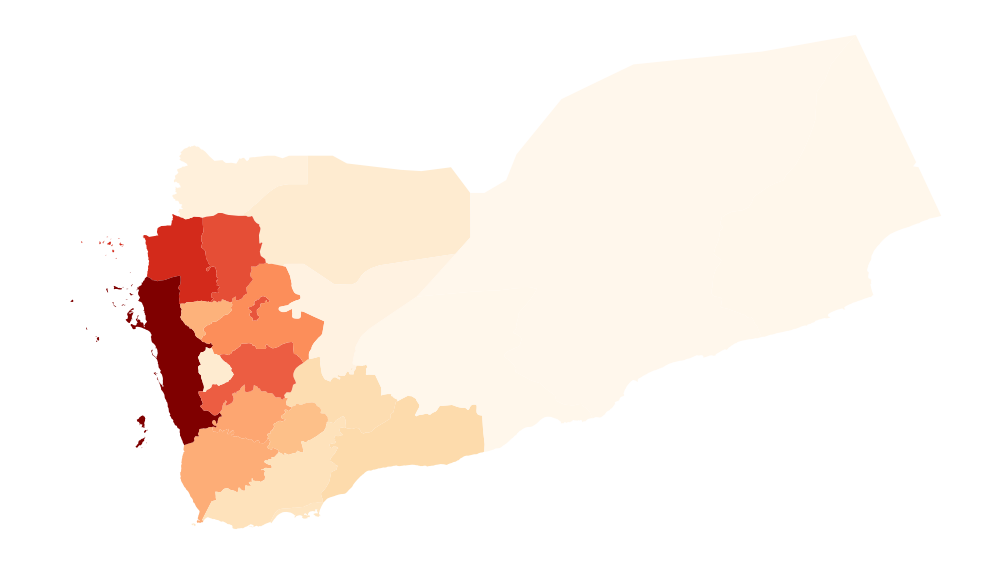

In [168]:
fig, ax = plt.subplots(figsize=(25,10))
ax.set_aspect('equal')
ax.set_axis_off()
pl = pts2.loc[pts2.Date == "2017-11-08"]
pl.plot(ax=ax, column='Cases', cmap='OrRd')